# TELECOM CLIENT CHURN EXPLORATORY DATA ANALYSIS 

Using Data Science to address Customer Churn

##  OUTLINE
1. Purpose
2. Background
2. Key Questions
4. Decision Cycle
  * Key Drivers
  * Solution overview
5. Data
6. Analysis
   * -Business understanding
   * -Identify data requirements
   * -Extract data
   * -Aggregate, Clean and Standarize data
7. Report and Predict
   * -Busines analysis
   * -Predicitive model design
   * -Development and Implementation of Predictive model
8. Engage and Act
   * -List of churn drivers/KPI for tracking and monitoring
   * -List of recommended subscribers for targeted churn campaigns
   * -Monthly churn initiatives

##  PURPOSE

The purpose of this report is to examine the reasons for client churn, to draw conclusions and recommendations to improve client retention.  

##  BACKGROUND
The telecom industry is a very competitive one. Mobile/Internet market is saturated and dominated by a few players. 
  This environment leads to intense price wars. Customers have also become smarter and more demanding and loyalty has been swaped by switching every 1/2 years to obtain the best offer on the market. 
Although market share is important and obtaining new customers is paramount, optimizing retention continues to be vital for Telecom operators. 
  To exploit cost efficiencies, installing internet and initial contracting costs should be aimed to be spread over a longer periods than just one year contract´s. 
  
  It costs up to 5 times as much to acquire a new subscriber as to retain and existing one at the same time that a churned costumer provides 0 revenue and increases competitor market share. 


But, is price the only motive for churning? Good service, time response, accurate invoicing among other factors are also at play at one's decision to switch.

##  KEY QUESTIONS
- How can I understand my churn situation better? Both at macro (organization) and micro (subscriber) levels?
- What are the key drivers of churn and what is influencing them?
- What are the appropiate churn initiatives that should be launched to address the different churn drivers?

##  DECISION CYCLE
                              It´s too complex            INERT SUBSCRIBER

          I haven´t thought   No time/not worth it 
           of churning                                
Customer                      I'm happy in my company     UNCONDITIONALLY LOYAL


          I have though       But I am locked in by my contract     LOCKED 
          of churning 
                              I am not locked in my contract        I decide to stay      CONDITIONAL LOYAL
                                           
                                                                    I decide to leave     I found better offer CONDITIONAL CHU
                                                                                 
                                                                                          my needs have changed 
                                                                                          I am not satisfied  UNSATISFIED CHU
                                                                                          
                                                                                          
##  KEY DRIVERS
CHURN
- Cost of service/Competitor pricing
- Network Quality
- Customer Care Quality
- Others

LOYALTY
- Offers and services
- Price
- Quality of products
- Quality of customer service
- Lenght of contract period
- Perception of telecom brand
- Marketing

##  SOLUTION OVERVIEW
- Developing customer 360
- Behavioural segmentation of base
- Build churn predictive models
- Generate Target lists for campaigns

- Ability to effectively manage customer churn through preventive management using leading and lagging indicators of churn.
- Ability to identify and save customer who are about to churn
- Assess insights on churn behaviour of subscribers; and using the information, to strategize new marketing initiatives
- Identify patterns in customer behaviour of potential churners and initiate pro-active measures to reduce churn
- Capabilities in driving analytics led campaign /marketing initiatives from Predictive Model experience
- Reduction in the campaign spend by targeting fewer subscribers, exhibiting churn behaviour, rather than targeting larger base on gut feel.
- Report revenue loss effected due to churn
- Classification of subscribers as voluntary/involuntary churners
- Cost savings from retention as opposed to re-acquisition

##  DATA DESCRIPTION
The data pertains to client churn information for the third quater for the year 2021 extracted from the Retention excel answers from the forms filled up by the retention team. 
For data protection purposes all personal information has been deleted prior to the upload process. 

In [2]:
!pip install numpy
!pip install pandas

## Data Loading

In [3]:
import pandas as pd
import numpy as np
import pandas_profiling
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
data= pd.read_csv('TelcoData.csv',  delimiter=',')

In [5]:
data


,Date,Chanel,Fecha,Service,ChurnReason,Action,OfferLevel,Resolution,NewOperator
0,30/09/2021,Fijo Pot-Out (Portanet),1/10/2021,Esencial + Voz + Móvil,Desconocimiento de motivo,Propuesta de Promoción,PROMO LEVEL 2,RETENIDO PROMO,Ninguno
1,1/10/2021,Fijo Pot-Out (Portanet),1/10/2021,Esencial + Voz,Desconocimiento de motivo,Ilocalizable,No se ofreció Promo de servicios,Churn - Motivos personales,Movistar
2,1/10/2021,Inbound,1/10/2021,Fast! + Voz,Económico,Cliente no quiere escuchar oferta,No se ofreció Promo de servicios,Churn - Competidor Mejor Precio,Ninguno
3,29/09/2021,Inbound,29/09/2021,Fast! + Móvil,Económico,Propuesta de Promoción,PROMO LEVEL 1,RETENIDO PROMO,Ninguno
4,1/10/2021,Email,1/10/2021,Fast!,Competidor - No Informa,Cliente no quiere escuchar oferta,No se ofreció Promo de servicios,Churn - Competitor - No Informa,Virgin
...,...,...,...,...,...,...,...,...,...
8584,31/12/2021,Inbound,NaN,Fast!,Incidencia técnica,Cliente no quiere escuchar oferta,Solución Técnica,Churn - Motivos tecnicos,Ninguno
8585,31/12/2021,Inbound,NaN,Fast! + Voz + Móvil,Económico,Propuesta de Promoción,PROMO LEVEL 2,RETENIDO PROMO,Ninguno
8586,31/12/2021,Inbound,NaN,Fast!,Económico,Propuesta de Promoción,PROMO LEVEL 2,RETENIDO PROMO,Ninguno
8587,31/12/2021,Inbound,NaN,Fast! + Voz + Móvil,Económico,Propuesta de Promoción,PROMO LEVEL 2,Pendiente Eq. Experiencia de Clientes - Agendada,Ninguno


In [6]:
data.info(verbose=True ) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8589 entries, 0 to 8588
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         8589 non-null   object
 1   Chanel       8589 non-null   object
 2   Fecha        758 non-null    object
 3   Service      8589 non-null   object
 4   ChurnReason  8589 non-null   object
 5   Action       8589 non-null   object
 6   OfferLevel   8589 non-null   object
 7   Resolution   8589 non-null   object
 8   NewOperator  8589 non-null   object
dtypes: object(9)
memory usage: 604.0+ KB


## DATA VOLUME AND TYPE

In [7]:
data.shape

(8589, 9)

## CLEANING DE DATA


In [8]:
data.isnull().values.any()

True

In [9]:
data.isna()

,Date,Chanel,Fecha,Service,ChurnReason,Action,OfferLevel,Resolution,NewOperator
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
8584,False,False,True,False,False,False,False,False,False
8585,False,False,True,False,False,False,False,False,False
8586,False,False,True,False,False,False,False,False,False
8587,False,False,True,False,False,False,False,False,False


In [10]:
#Columns with NA values:
data.columns[data.isnull().any()]

Index(['Fecha'], dtype='object')

In [11]:
#We will drop the 'Fecha' column as its a duplicate of the date column:
data.drop(['Fecha'], axis=1)


,Date,Chanel,Service,ChurnReason,Action,OfferLevel,Resolution,NewOperator
0,30/09/2021,Fijo Pot-Out (Portanet),Esencial + Voz + Móvil,Desconocimiento de motivo,Propuesta de Promoción,PROMO LEVEL 2,RETENIDO PROMO,Ninguno
1,1/10/2021,Fijo Pot-Out (Portanet),Esencial + Voz,Desconocimiento de motivo,Ilocalizable,No se ofreció Promo de servicios,Churn - Motivos personales,Movistar
2,1/10/2021,Inbound,Fast! + Voz,Económico,Cliente no quiere escuchar oferta,No se ofreció Promo de servicios,Churn - Competidor Mejor Precio,Ninguno
3,29/09/2021,Inbound,Fast! + Móvil,Económico,Propuesta de Promoción,PROMO LEVEL 1,RETENIDO PROMO,Ninguno
4,1/10/2021,Email,Fast!,Competidor - No Informa,Cliente no quiere escuchar oferta,No se ofreció Promo de servicios,Churn - Competitor - No Informa,Virgin
...,...,...,...,...,...,...,...,...
8584,31/12/2021,Inbound,Fast!,Incidencia técnica,Cliente no quiere escuchar oferta,Solución Técnica,Churn - Motivos tecnicos,Ninguno
8585,31/12/2021,Inbound,Fast! + Voz + Móvil,Económico,Propuesta de Promoción,PROMO LEVEL 2,RETENIDO PROMO,Ninguno
8586,31/12/2021,Inbound,Fast!,Económico,Propuesta de Promoción,PROMO LEVEL 2,RETENIDO PROMO,Ninguno
8587,31/12/2021,Inbound,Fast! + Voz + Móvil,Económico,Propuesta de Promoción,PROMO LEVEL 2,Pendiente Eq. Experiencia de Clientes - Agendada,Ninguno


In [12]:
data.shape

(8589, 9)

In [13]:
#We will be analizing 8589 calls pertaining to October, November and December 2021

In [14]:
#Let's explore the source of the calls
data.groupby('Chanel').count()

,Date,Fecha,Service,ChurnReason,Action,OfferLevel,Resolution,NewOperator
Chanel,,,,,,,,
Call Back,498,26,498,498,498,498,498,498
Campaña Emailing,195,105,195,195,195,195,195,195
Email,277,22,277,277,277,277,277,277
Fijo Pot-Out (Portanet),947,79,947,947,947,947,947,947
Inbound,6536,519,6536,6536,6536,6536,6536,6536
Inbound - Empresas,4,1,4,4,4,4,4,4
Outbound,132,6,132,132,132,132,132,132


In [15]:
data.groupby(['Chanel']).size().plot.pie(figsize=(10,10))
plt.show()


<ipython-input-15-a9578c4dfe17>:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [16]:
data['Chanel'].value_counts(normalize=True)

Inbound                    0.760973
Fijo Pot-Out (Portanet)    0.110257
Call Back                  0.057981
Email                      0.032251
Campaña Emailing           0.022703
Outbound                   0.015368
Inbound - Empresas         0.000466
Name: Chanel, dtype: float64

In [17]:
#76% of the interaction with clients are inbound calls. While 11% are direct mobile/voip churn entries.

In [18]:
#Let's explore what are the products that client have:
data.groupby('Service').count()

,Date,Chanel,Fecha,ChurnReason,Action,OfferLevel,Resolution,NewOperator
Service,,,,,,,,
Esencial,540,540,67,540,540,540,540,540
Esencial + Móvil,109,109,6,109,109,109,109,109
Esencial + Voz,87,87,5,87,87,87,87,87
Esencial + Voz + Móvil,128,128,6,128,128,128,128,128
Fast!,3203,3203,366,3203,3203,3203,3203,3203
Fast! + Móvil,1811,1811,111,1811,1811,1811,1811,1811
Fast! + Voz,1031,1031,95,1031,1031,1031,1031,1031
Fast! + Voz + Móvil,1583,1583,96,1583,1583,1583,1583,1583
Negocio (Fast+Voz),62,62,3,62,62,62,62,62


In [19]:
data.groupby(['Service']).size().plot.pie(figsize=(10,10))
plt.show()

<ipython-input-19-134e999824f5>:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [20]:
data['Service'].value_counts(normalize=True)

Fast!                       0.372919
Fast! + Móvil               0.210851
Fast! + Voz + Móvil         0.184306
Fast! + Voz                 0.120037
Esencial                    0.062871
Esencial + Voz + Móvil      0.014903
Esencial + Móvil            0.012691
Esencial + Voz              0.010129
Negocio (Fast+Voz)          0.007219
SuperFast!                  0.002329
SuperFast! + Voz            0.000815
SuperFast! + Voz + Móvil    0.000815
SuperFast! + Móvil          0.000116
Name: Service, dtype: float64

In [21]:
#A large percentage of clients only have internet. There is an opportunity to grow with cross-selling mobile lines 
# and perhaps launching an 'Add your line' campaign. The service provider is known for taking internet to remote areas where 
#Mobile connectivity is very low and where only few operators have good mobile coverage.

In [22]:
#Let's explore the reasons for contacting...
data.groupby('ChurnReason').count()

,Date,Chanel,Fecha,Service,Action,OfferLevel,Resolution,NewOperator
ChurnReason,,,,,,,,
Competidor - No Informa,177,177,7,177,177,177,177,177
Competidor - Precio,1003,1003,65,1003,1003,1003,1003,1003
Competidor - Prestaciones,258,258,22,258,258,258,258,258
Desconocimiento de motivo,797,797,94,797,797,797,797,797
Desuso,704,704,93,704,704,704,704,704
Económico,2622,2622,150,2622,2622,2622,2622,2622
Incidencia administrativa,167,167,8,167,167,167,167,167
Incidencia comercial,174,174,9,174,174,174,174,174
Incidencia técnica,637,637,52,637,637,637,637,637


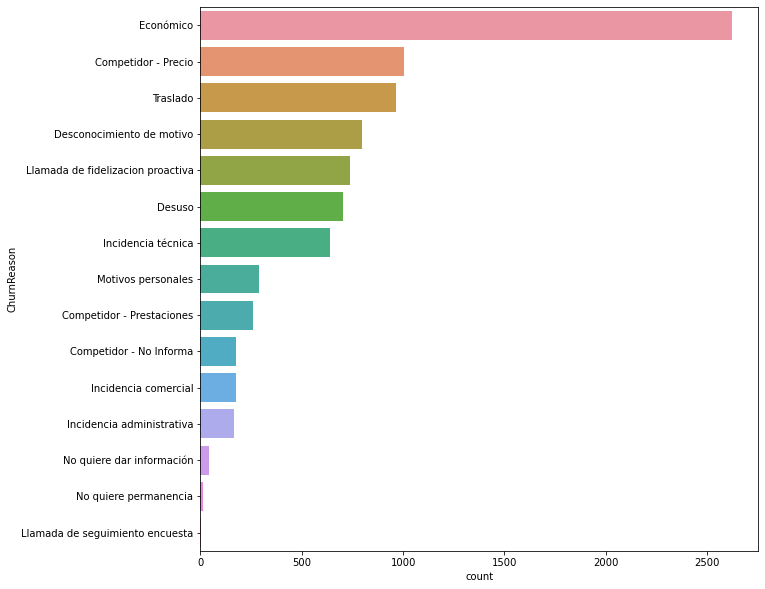

In [23]:

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize= (10,10) )


sns.countplot(data=data, y='ChurnReason', order=data.ChurnReason.value_counts().iloc[:15].index)

plt.show()


In [24]:
data['ChurnReason'].value_counts(normalize=True)

Económico                            0.305274
Competidor - Precio                  0.116777
Traslado                             0.112586
Desconocimiento de motivo            0.092793
Llamada de fidelizacion proactiva    0.085924
Desuso                               0.081965
Incidencia técnica                   0.074165
Motivos personales                   0.033648
Competidor - Prestaciones            0.030038
Competidor - No Informa              0.020608
Incidencia comercial                 0.020258
Incidencia administrativa            0.019443
No quiere dar información            0.004774
No quiere permanencia                0.001514
Llamada de seguimiento encuesta      0.000233
Name: ChurnReason, dtype: float64

In [25]:
#We can clearly depict the motives of the calls being a price issue, 30% and 11% are driven by price while 11% is from moving
# to a different city.  
#Tecnical and administrative issues account for 7% and 1%

In [26]:
#Let´s explore the resolution for the cal
data.groupby('Resolution').count()

,Date,Chanel,Fecha,Service,ChurnReason,Action,OfferLevel,NewOperator
Resolution,,,,,,,,
Churn - Baja y Alta en este o nuevo dom. para conseguir promo de captación,23,23,1,23,23,23,23,23
Churn - Cliente con deuda por no gestión de baja,2,2,0,2,2,2,2,2
Churn - Competidor - Penalización otro Operador,48,48,3,48,48,48,48,48
Churn - Competidor Mejor Cobertura móvil,15,15,1,15,15,15,15,15
Churn - Competidor Mejor Precio,465,465,31,465,465,465,465,465
Churn - Competidor Mejor Precio Datos Móviles,25,25,2,25,25,25,25,25
Churn - Competidor Mejor Precio Internet,53,53,6,53,53,53,53,53
Churn - Competidor Prestaciones,74,74,10,74,74,74,74,74
Churn - Competidor Prestaciones Cobertura Móvil,13,13,1,13,13,13,13,13


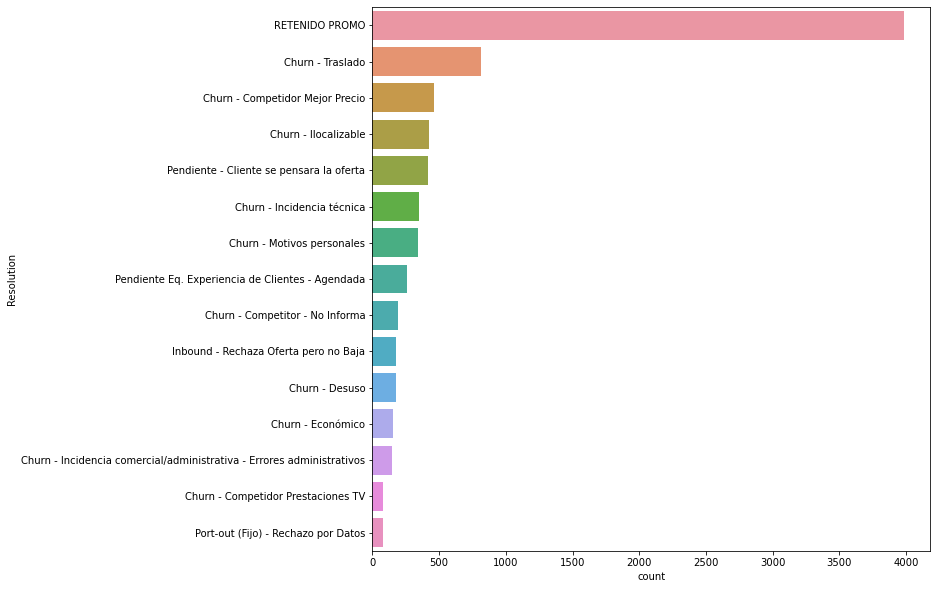

In [27]:

plt.figure(figsize= (10,10) )

sns.countplot(data=data, y='Resolution', order=data.Resolution.value_counts().iloc[:15].index)

plt.show()

In [28]:
data['Resolution'].value_counts(normalize=True)

RETENIDO PROMO                                                                0.463616
Churn - Traslado                                                              0.094656
Churn - Competidor Mejor Precio                                               0.054139
Churn - Ilocalizable                                                          0.049249
Pendiente - Cliente se pensara la oferta                                      0.048201
Churn - Incidencia técnica                                                    0.040517
Churn - Motivos personales                                                    0.040051
Pendiente Eq. Experiencia de Clientes - Agendada                              0.030038
Churn - Competitor - No Informa                                               0.022121
Inbound - Rechaza Oferta pero no Baja                                         0.020608
Churn - Desuso                                                                0.020491
Churn - Económico                          

In [29]:
#We can clearly see that retention given an offer is of 42% while being the top churning a moving from the client at 0.09% 
#0.06 for competitor price.

In [30]:
#Let´s see what the most popular offers

In [31]:
data['OfferLevel'].value_counts(normalize=True)

No se ofreció Promo de servicios    0.366282
PROMO LEVEL 1                       0.175573
PROMO 12m Sin Permanencia           0.094889
PROMO LEVEL 3                       0.093026
PROMO LEVEL 2                       0.075445
Susp.Temporal a 0€                  0.070672
OFERTA FIDELIZACION EMAIL           0.036442
OFERTA ADQUISICION                  0.026662
OFERTA W                            0.020841
OFERTA 2a RES / POCO USO            0.010479
Upselling movil                     0.010013
Downgrade                           0.009547
Solución Administrativa             0.004541
Solución Técnica                    0.003376
OFERTA COMPRA PERMA                 0.002212
Name: OfferLevel, dtype: float64

In [32]:
#Let's look at the churning options of the client which company they tend to switch to?

In [33]:
pd.set_option('display.max_rows', 62)
data['NewOperator'].value_counts(normalize=True)

Ninguno                0.618931
Cliente no informa     0.113168
Otros                  0.100128
Movistar               0.038538
Euskaltel              0.020724
Masmóvil               0.020375
Vodafone               0.020258
Orange                 0.014553
Jazztel                0.013855
Digi                   0.011294
Yoigo                  0.008499
Xfera (Masvovil)       0.005938
Virgin                 0.005006
Lowi                   0.002678
Pepephone              0.002212
Parlem                 0.001164
Lycamobile             0.000815
R Cable                0.000466
Portanet no informa    0.000349
Knet                   0.000349
Ono                    0.000116
Telecable              0.000116
LlamaYa                0.000116
Aire                   0.000116
Gurbtec                0.000116
Gestioniza             0.000116
Name: NewOperator, dtype: float64

In [34]:
operators= data[data['NewOperator'].str.contains
('Ninguno|Cliente no informa') == False]
operators.rename(columns = {'NewOperator':'operator'}, inplace = True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


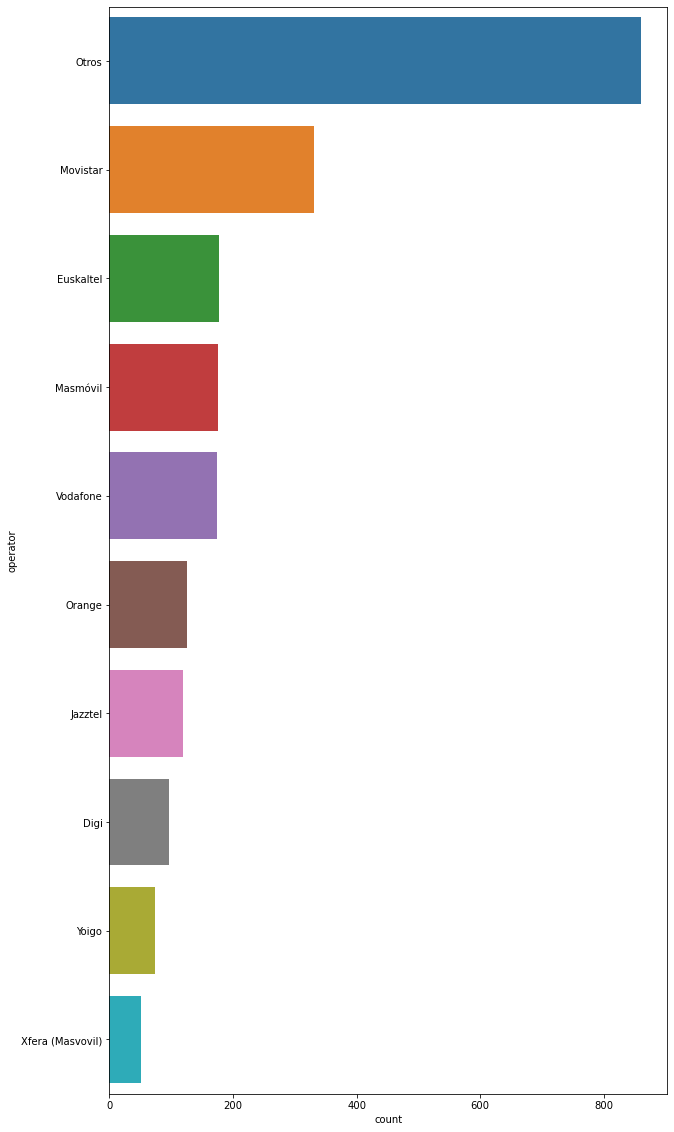

In [35]:
plt.figure(figsize= (10,20) )

sns.countplot(data=operators, y='operator', order=operators.operator.value_counts().iloc[:10].index)
plt.show()

In [36]:
#To observe any correlation to churn decision we will create a boleean variable to describe if a customer has churned or not
temp=["RETENIDO PROMO","Pendiente - Cliente se pensara la oferta", "Pendiente Eq. Experiencia de Clientes - Agendada", 
      "Upselling Only","Outbound - Oferta ACEPTADA","RETENIDO","PROMO 12m Sin Permanencia"]
      
data['Churn']= np.where(data['Resolution'].isin(temp), 0,1)

In [37]:
data['Churn'].value_counts(normalize=True)

0    0.546047
1    0.453953
Name: Churn, dtype: float64

<AxesSubplot:ylabel='Churn'>

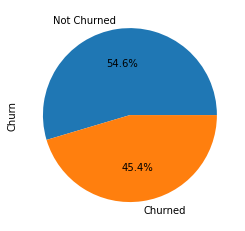

In [38]:
data['Churn'].value_counts(normalize=True).plot.pie(labels=['Not Churned','Churned'],autopct='%1.1f%%')

In [39]:
#The only variable that we can explore correlation regarding churning is the service we will create new columns to explore
#which holding service tends to churn more

dummies=pd.get_dummies(data['Service'],drop_first=True)

dummies.head()

,Esencial + Móvil,Esencial + Voz,Esencial + Voz + Móvil,Fast!,Fast! + Móvil,Fast! + Voz,Fast! + Voz + Móvil,Negocio (Fast+Voz),SuperFast!,SuperFast! + Móvil,SuperFast! + Voz,SuperFast! + Voz + Móvil
0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [41]:
data=pd.concat([data.drop('Service',axis=1),dummies],axis=1)

In [42]:
data.columns

Index(['Date', 'Chanel', 'Fecha', 'ChurnReason', 'Action', 'OfferLevel',
       'Resolution', 'NewOperator', 'Churn', 'Esencial + Móvil',
       'Esencial + Voz', 'Esencial + Voz + Móvil', 'Fast!', 'Fast! + Móvil',
       'Fast! + Voz', 'Fast! + Voz + Móvil', 'Negocio (Fast+Voz)',
       'SuperFast!', 'SuperFast! + Móvil', 'SuperFast! + Voz',
       'SuperFast! + Voz + Móvil'],
      dtype='object')

In [43]:
data.corr()

,Churn,Esencial + Móvil,Esencial + Voz,Esencial + Voz + Móvil,Fast!,Fast! + Móvil,Fast! + Voz,Fast! + Voz + Móvil,Negocio (Fast+Voz),SuperFast!,SuperFast! + Móvil,SuperFast! + Voz,SuperFast! + Voz + Móvil
Churn,1.000000,-0.040698,0.017530,-0.052315,0.156191,-0.171474,0.138131,-0.095056,0.093521,0.009320,0.011835,-0.001456,-0.001456
Esencial + Móvil,-0.040698,1.000000,-0.011469,-0.013945,-0.087430,-0.058604,-0.041874,-0.053892,-0.009667,-0.005477,-0.001223,-0.003238,-0.003238
Esencial + Voz,0.017530,-0.011469,1.000000,-0.012442,-0.078009,-0.052289,-0.037362,-0.048084,-0.008626,-0.004887,-0.001092,-0.002889,-0.002889
Esencial + Voz + Móvil,-0.052315,-0.013945,-0.012442,1.000000,-0.094850,-0.063577,-0.045428,-0.058465,-0.010488,-0.005942,-0.001327,-0.003513,-0.003513
Fast!,0.156191,-0.087430,-0.078009,-0.094850,1.000000,-0.398615,-0.284820,-0.366565,-0.065757,-0.037256,-0.008321,-0.022024,-0.022024
Fast! + Móvil,-0.171474,-0.058604,-0.052289,-0.063577,-0.398615,1.000000,-0.190912,-0.245705,-0.044076,-0.024972,-0.005578,-0.014763,-0.014763
Fast! + Voz,0.138131,-0.041874,-0.037362,-0.045428,-0.284820,-0.190912,1.000000,-0.175562,-0.031494,-0.017843,-0.003985,-0.010548,-0.010548
Fast! + Voz + Móvil,-0.095056,-0.053892,-0.048084,-0.058465,-0.366565,-0.245705,-0.175562,1.000000,-0.040532,-0.022964,-0.005129,-0.013576,-0.013576
Negocio (Fast+Voz),0.093521,-0.009667,-0.008626,-0.010488,-0.065757,-0.044076,-0.031494,-0.040532,1.000000,-0.004120,-0.000920,-0.002435,-0.002435
SuperFast!,0.009320,-0.005477,-0.004887,-0.005942,-0.037256,-0.024972,-0.017843,-0.022964,-0.004120,1.000000,-0.000521,-0.001380,-0.001380


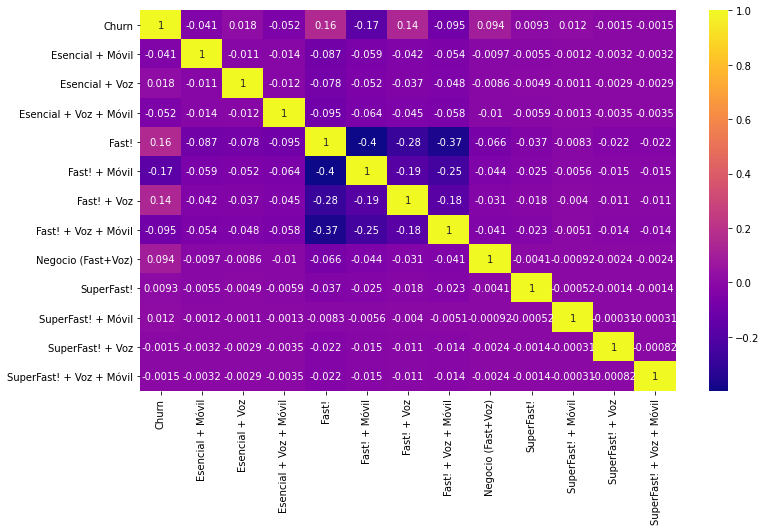

In [44]:
plt.figure(figsize=(12,7))
sns.heatmap(
    data.corr(),
    annot=True,
    cmap='plasma'
)
plt.show()

In [ ]:
# We will Draw a nested violinplot and split the violins for easier comparison
sns.set_theme(style="whitegrid")


sns.violinplot(data=data, x="count", y="date", hue="Churn",
               split=True, inner="quart", linewidth=1,
               palette={"Yes": "b", "No": ".85"})
sns.despine(left=True)

In [ ]:
##RECOMENDATIONS

#Price was the main factor for churning, this issue has already been adressed in this quater by exploring competitors offers
#and by launching the January Sale. To improve the churning in the future it is  recommended:
#

- Developing customer 360
#It is important to create a master customer record by aggregating all data about that customer from across the organization
#to utilize and analyse

- Behavioural segmentation of base
#With a proper customer record we would be able to segmentate clients based on information

- Build churn predictive models
#With current data we are unable to build a predictive model, having the address, gender, age and other information will 
#allow us to test some predictive models.

- Generate Target lists for campaigns
#Once we finalize a predictive model we will be able to generate targeted lists of clients that will be more likely to 
#churn and those models will give us:

- Ability to effectively manage customer churn through preventive management using leading and lagging indicators of churn.
- Ability to identify and save customer who are about to churn
- Assess insights on churn behaviour of subscribers; and using the information, to strategize new marketing initiatives
- Identify patterns in customer behaviour of potential churners and initiate pro-active measures to reduce churn
- Capabilities in driving analytics led campaign /marketing initiatives from Predictive Model experience
- Reduction in the campaign spend by targeting fewer subscribers, exhibiting churn behaviour, rather than targeting larger base on gut feel.
- Report revenue loss effected due to churn
- Classification of subscribers as voluntary/involuntary churners
- Cost savings from retention as opposed to re-acquisition

In [ ]:
#how long  before the end of contract variable
#create new features to see correlation, the service that more churn, overtime?, split services? internet vs internte +mpbile
#,  we already know about competitors, what else is wrong?, remove competitor and visualize, exploring the emotional reason
#what actions work